## Spambase Dataset
Dataset pochodzi z [kaggle](https://www.kaggle.com/datasets/somesh24/spambase) i składa się z różnych statystyk wygenerowanych z otrzymanych maili (głównie z procentowej zawartości wybranych słów i specjalnych znaków) oraz z etykietą mówiącą o tym, czy dany e-mail jest klasyfikowany jako spam, czy też nie.

In [1]:
import pandas as pd

dataset = pd.read_csv('spambase_csv.csv')
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

"Niestety" *dataset* nie zawiera żadnych kolumn z wartościami *nullowymi*, więc musimy sami stworzyć luki. Ustawmy najpierw *seed*, z którego będziemy korzystać w całym projekcie.

In [3]:
seed = 1337

Mamy 4601 wierszy oraz 57 interesujących nas wartości w każdej (nie chcę tworzyć luk w etykietach), tj. łącznie *262,257* wartości. Powiedzmy, że chcemy, aby ok. 5% komórek było wypełnionych *NaN*ami.

In [4]:
import random

data = dataset.drop(columns=['class'])
labels = dataset['class']

random.seed(seed)

num_columns = data.shape[1]
num_rows = data.shape[0]
total = num_rows * num_columns
n = total // 20
numbers = set()
while len(numbers) < n:
    numbers.add(random.randint(0, total))
numbers = list(numbers)
numbers[:10]

[65538, 6, 262153, 262154, 131082, 98321, 32785, 65556, 32791, 163873]

Każdą wylosowaną liczbę będziemy teraz konwertowali na odpowiedni indeks w datasecie. 

In [5]:
import numpy as np

for number in numbers:
    row, column = number // num_columns, number % num_columns
    data.iat[row, column] = np.nan
    
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,NaN,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,NaN,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,NaN,0.07,0.00,0.94,...,NaN,NaN,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,NaN,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,NaN,0.0,0.135,0.000,0.000,3.537,40.0,191.0


Ponownie sprawdźmy liczbę *null*i:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4383 non-null   float64
 1   word_freq_address           4359 non-null   float64
 2   word_freq_all               4343 non-null   float64
 3   word_freq_3d                4367 non-null   float64
 4   word_freq_our               4385 non-null   float64
 5   word_freq_over              4382 non-null   float64
 6   word_freq_remove            4381 non-null   float64
 7   word_freq_internet          4368 non-null   float64
 8   word_freq_order             4388 non-null   float64
 9   word_freq_mail              4369 non-null   float64
 10  word_freq_receive           4402 non-null   float64
 11  word_freq_will              4339 non-null   float64
 12  word_freq_people            4376 non-null   float64
 13  word_freq_report            4380 

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4383.000000,4359.000000,4343.000000,4367.000000,4385.000000,4382.000000,4381.000000,4368.000000,4388.000000,4369.000000,4402.000000,4339.000000,4376.000000,4380.000000,4353.000000,4397.000000,4371.000000,4365.000000,4359.000000,4362.000000,4400.000000,4372.000000,4373.000000,4386.000000,4372.000000,4367.000000,4392.000000,4385.000000,4377.000000,4360.000000,4361.000000,4361.000000,4353.000000,4386.000000,4373.000000,4354.000000,4349.000000,4380.000000,4360.000000,4379.000000,4376.000000,4373.000000,4385.000000,4363.000000,4368.000000,4370.000000,4353.000000,4362.000000,4360.000000,4372.000000,4350.000000,4373.000000,4383.000000,4340.000000,4398.000000,4375.000000,4375.000000
mean,0.105494,0.215361,0.280813,0.068793,0.313763,0.095842,0.115054,0.105151,0.089991,0.238718,0.060968,0.538324,0.094088,0.059881,0.047409,0.245713,0.143814,0.186685,1.661755,0.087125,0.807457,0.118792,0.101475,0.093005,0.542836,0.259166,0.772632,0.123024,0.096255,0.104206,0.065863,0.045368,0.097225,0.048525,0.105180,0.099596,0.138459,0.013146,0.079259,0.063156,0.043190,0.128658,0.045574,0.077043,0.300506,0.179421,0.005215,0.032407,0.036238,0.137593,0.017218,0.272041,0.076350,0.044526,5.246067,52.689600,280.305143
std,0.308533,1.306364,0.505388,1.431944,0.671920,0.272309,0.394845,0.404086,0.279369,0.644470,0.204305,0.857327,0.302030,0.340456,0.252212,0.795970,0.448318,0.534015,1.765929,0.520858,1.198314,1.016130,0.350780,0.442899,1.656395,0.856240,3.384791,0.522384,0.558797,0.460649,0.407041,0.326209,0.557437,0.330978,0.533905,0.409431,0.428712,0.224730,0.438120,0.342838,0.363853,0.743579,0.221837,0.582834,1.017417,0.919423,0.072663,0.291315,0.228100,0.260008,0.110894,0.830417,0.249458,0.439785,32.399849,198.257777,602.768256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.586500,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [8]:
for column in data.columns:
    print(data[column].value_counts())
    print()

word_freq_make
0.00    3384
0.10      49
0.09      39
0.17      36
0.08      30
0.05      23
0.07      20
0.33      19
0.34      19
0.06      17
0.14      16
0.19      16
0.26      16
0.12      16
0.23      15
0.43      15
0.27      14
0.13      14
0.32      14
0.31      13
0.18      13
0.40      13
0.16      13
0.15      13
0.11      12
0.51      12
0.29      12
0.44      12
0.54      12
0.30      12
0.49      12
0.39      12
0.47      12
0.25      11
0.58      11
0.46      11
2.00      11
0.22      11
0.35      11
0.20      10
0.52       9
0.90       9
0.67       9
0.28       9
0.41       8
0.50       8
0.59       8
0.36       8
0.04       7
0.42       7
0.77       7
0.76       7
0.45       7
1.24       7
0.74       7
0.71       7
0.87       7
0.68       6
0.64       6
0.60       6
0.21       6
0.73       6
0.38       6
0.48       6
0.24       6
0.37       6
0.78       5
0.56       5
1.18       5
0.53       5
1.00       5
0.62       5
0.02       4
1.03       4
0.95       4
0.84      

char_freq_%21
0.000    2226
0.010      12
0.149      11
0.045      10
0.016      10
         ... 
0.582       1
1.680       1
2.143       1
1.663       1
1.052       1
Name: count, Length: 939, dtype: int64

char_freq_%24
0.000    3052
0.118      16
0.061      13
0.158      12
0.014      11
0.031      11
0.062      10
0.056       9
0.157       9
0.107       9
0.016       9
0.022       9
0.105       9
0.063       9
0.024       8
0.141       8
0.021       8
0.160       8
0.168       8
0.191       8
0.165       8
0.159       7
0.059       7
0.032       7
0.013       7
0.041       7
0.054       7
0.212       7
0.114       7
0.121       7
0.065       7
0.103       7
0.370       7
0.053       7
0.046       7
0.167       7
0.230       7
0.182       7
0.132       7
0.037       7
0.048       7
0.223       7
0.036       7
0.124       6
0.043       6
0.029       6
0.127       6
0.023       6
0.161       6
0.211       6
0.027       6
0.169       6
0.017       6
0.015       6
0.224       6
0.162   

Kolumny opisujące **word_freq_*** oraz **capital_run_*** uzupełnimy medianą, a resztę - średnią. Do wyboru kolumn w transformatorze wykorzystam **DataFrameSelector** z notebooka **Z09_E_titanic**.

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Zanim przejdziemy do tworzenia pipeline'a, usuńmy dwie kolumny - **word_freq_george** oraz **word_freq_650**. Zgodnie z opisem na kaggle, *George* jest imieniem jednego z pracowników, a *650* numerem kierunkowym - więc jeśli chcemy stworzyć w miarę ogólny filter spamu, to powinniśmy się pozbyć tych kolumn.

In [10]:
data.drop(columns=['word_freq_george', 'word_freq_650'], inplace=True)

In [11]:
median_columns = []
avg_columns = []
for column in data.columns:
    if 'word_freq_' in column or 'capital_run_' in column:
        median_columns.append(column)
    else:
        avg_columns.append(column)

In [12]:
median_columns

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total'

In [13]:
avg_columns

['char_freq_%3B',
 'char_freq_%28',
 'char_freq_%5B',
 'char_freq_%21',
 'char_freq_%24',
 'char_freq_%23']

In [14]:
from sklearn.pipeline import FeatureUnion

median_pipeline = Pipeline([
    ('selector', DataFrameSelector(median_columns)),
    ('imputer', SimpleImputer(strategy='median')),
])

avg_pipeline = Pipeline([
    ('selector', DataFrameSelector(avg_columns)),
    ('imputer', SimpleImputer(strategy='mean'))
])

fill_pipeline = FeatureUnion(
    transformer_list = [
        ('median', median_pipeline),
        ('average', avg_pipeline),
    ]
)

In [15]:
data_filled = fill_pipeline.fit_transform(data)

In [16]:
data_filled[0]

array([0.00000000e+00, 6.40000000e-01, 6.40000000e-01, 0.00000000e+00,
       3.20000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.40000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.20000000e-01,
       0.00000000e+00, 1.29000000e+00, 1.93000000e+00, 0.00000000e+00,
       9.60000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.75600000e+00, 6.10000000e+01,
       2.78000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.78000000e-01, 0.00000000e+00, 4.45260369e-02])

Spójrzmy jeszcze na **PCA**:

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA()

data_filled = StandardScaler().fit_transform(data_filled)
pca_features = model.fit_transform(data_filled)

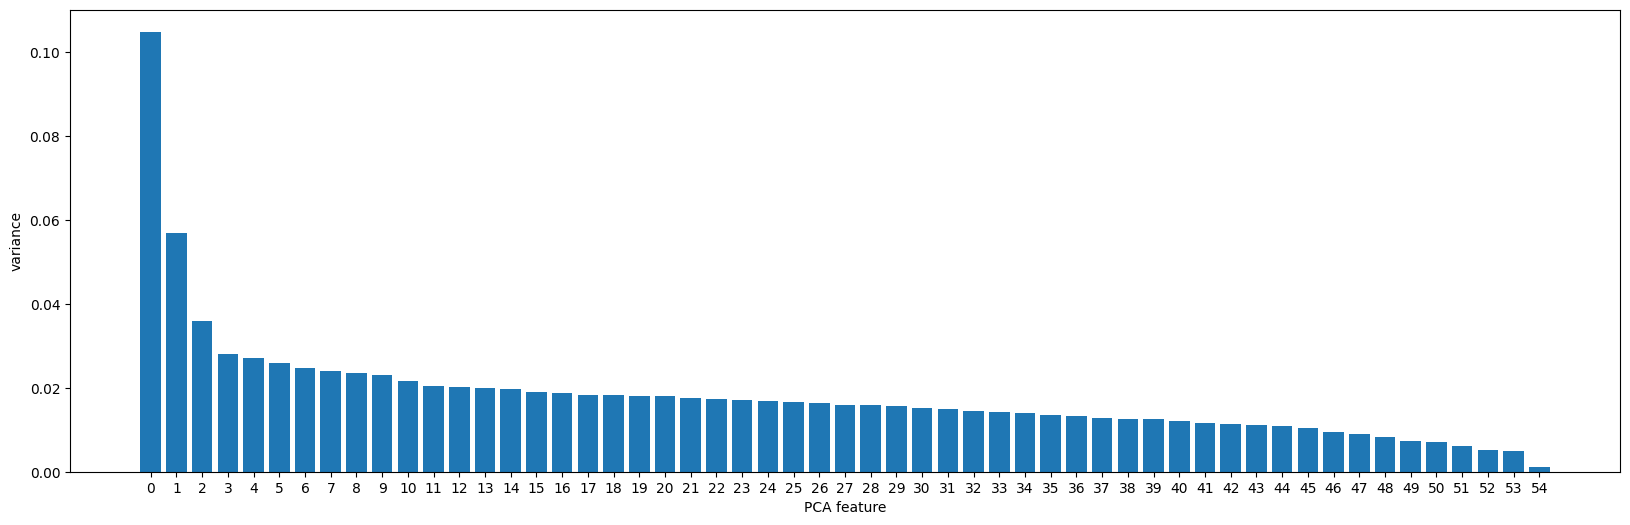

In [18]:
features = range(model.n_components_)
plt.figure(figsize=(20,6))
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Zredukujmy dane do 11 wymiarów.

In [19]:
final_pipeline = Pipeline([
    ('fill', fill_pipeline),
    ('scale', StandardScaler()),
    #('pca', PCA(11)),
])

Podzielmy na **train** i **test**.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

## Pierwszy model - SVM rbf

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

pipe = Pipeline([
    ('preprocessing', final_pipeline), 
    ('pca', PCA(11)),
    ('classifier', SVC(kernel='rbf'))
])

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

param_grid = {
            'pca': [PCA(11), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1., 10., 100.],
            'classifier__C': [0.001, 0.01, 0.1, 1., 10., 100.],
}


grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=10)

grid_1.fit(X_train, y_train)
grid_1.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 1/5; 1/72] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 2/5; 1/72] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 2/5; 1/72] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 3/5; 1/72] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 3/5; 1/72] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 4/5; 1/72] START classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 4/5; 1/72] END classifier__C=0.001, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4

[CV 3/5; 8/72] END classifier__C=0.001, classifier__gamma=1.0, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 4/5; 8/72] START classifier__C=0.001, classifier__gamma=1.0, pca=None.......
[CV 4/5; 8/72] END classifier__C=0.001, classifier__gamma=1.0, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 5/5; 8/72] START classifier__C=0.001, classifier__gamma=1.0, pca=None.......
[CV 5/5; 8/72] END classifier__C=0.001, classifier__gamma=1.0, pca=None;, score=(train=0.606, test=0.606) total time=   0.5s
[CV 1/5; 9/72] START classifier__C=0.001, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 1/5; 9/72] END classifier__C=0.001, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.4s
[CV 2/5; 9/72] START classifier__C=0.001, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 2/5; 9/72] END classifier__C=0.001, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.

[CV 5/5; 15/72] END classifier__C=0.01, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.762, test=0.758) total time=   0.4s
[CV 1/5; 16/72] START classifier__C=0.01, classifier__gamma=0.01, pca=None......
[CV 1/5; 16/72] END classifier__C=0.01, classifier__gamma=0.01, pca=None;, score=(train=0.634, test=0.628) total time=   0.5s
[CV 2/5; 16/72] START classifier__C=0.01, classifier__gamma=0.01, pca=None......
[CV 2/5; 16/72] END classifier__C=0.01, classifier__gamma=0.01, pca=None;, score=(train=0.627, test=0.630) total time=   0.6s
[CV 3/5; 16/72] START classifier__C=0.01, classifier__gamma=0.01, pca=None......
[CV 3/5; 16/72] END classifier__C=0.01, classifier__gamma=0.01, pca=None;, score=(train=0.633, test=0.628) total time=   0.5s
[CV 4/5; 16/72] START classifier__C=0.01, classifier__gamma=0.01, pca=None......
[CV 4/5; 16/72] END classifier__C=0.01, classifier__gamma=0.01, pca=None;, score=(train=0.643, test=0.635) total time=   0.5s
[CV 5/5; 16/72] START classifi

[CV 3/5; 23/72] END classifier__C=0.01, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.7s
[CV 4/5; 23/72] START classifier__C=0.01, classifier__gamma=100.0, pca=PCA(n_components=11)
[CV 4/5; 23/72] END classifier__C=0.01, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.7s
[CV 5/5; 23/72] START classifier__C=0.01, classifier__gamma=100.0, pca=PCA(n_components=11)
[CV 5/5; 23/72] END classifier__C=0.01, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.606, test=0.606) total time=   0.7s
[CV 1/5; 24/72] START classifier__C=0.01, classifier__gamma=100.0, pca=None.....
[CV 1/5; 24/72] END classifier__C=0.01, classifier__gamma=100.0, pca=None;, score=(train=0.606, test=0.606) total time=   1.0s
[CV 2/5; 24/72] START classifier__C=0.01, classifier__gamma=100.0, pca=None.....
[CV 2/5; 24/72] END classifier__C=0.01, classifier__gamma=100.0, pca=None;, score=(train=0.606, te

[CV 1/5; 31/72] END classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.755, test=0.736) total time=   0.4s
[CV 2/5; 31/72] START classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 2/5; 31/72] END classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.750, test=0.716) total time=   0.4s
[CV 3/5; 31/72] START classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 3/5; 31/72] END classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.743, test=0.739) total time=   0.4s
[CV 4/5; 31/72] START classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 4/5; 31/72] END classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11);, score=(train=0.762, test=0.742) total time=   0.4s
[CV 5/5; 31/72] START classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=11)
[CV 5/5; 31/72] END classifier__C=0.1, classifier__gamma=1.0, pca=PCA(n_components=1

[CV 4/5; 38/72] END classifier__C=1.0, classifier__gamma=0.001, pca=None;, score=(train=0.899, test=0.889) total time=   0.3s
[CV 5/5; 38/72] START classifier__C=1.0, classifier__gamma=0.001, pca=None......
[CV 5/5; 38/72] END classifier__C=1.0, classifier__gamma=0.001, pca=None;, score=(train=0.895, test=0.894) total time=   0.3s
[CV 1/5; 39/72] START classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11)
[CV 1/5; 39/72] END classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.905, test=0.879) total time=   0.1s
[CV 2/5; 39/72] START classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11)
[CV 2/5; 39/72] END classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.900, test=0.897) total time=   0.1s
[CV 3/5; 39/72] START classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11)
[CV 3/5; 39/72] END classifier__C=1.0, classifier__gamma=0.01, pca=PCA(n_components=11);, score=(train=0.907, test=

[CV 2/5; 46/72] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.997, test=0.662) total time=   0.9s
[CV 3/5; 46/72] START classifier__C=1.0, classifier__gamma=10.0, pca=None.......
[CV 3/5; 46/72] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.996, test=0.667) total time=   0.9s
[CV 4/5; 46/72] START classifier__C=1.0, classifier__gamma=10.0, pca=None.......
[CV 4/5; 46/72] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.997, test=0.659) total time=   0.9s
[CV 5/5; 46/72] START classifier__C=1.0, classifier__gamma=10.0, pca=None.......
[CV 5/5; 46/72] END classifier__C=1.0, classifier__gamma=10.0, pca=None;, score=(train=0.998, test=0.664) total time=   0.9s
[CV 1/5; 47/72] START classifier__C=1.0, classifier__gamma=100.0, pca=PCA(n_components=11)
[CV 1/5; 47/72] END classifier__C=1.0, classifier__gamma=100.0, pca=PCA(n_components=11);, score=(train=0.737, test=0.625) total time=   0.8s
[CV 2/5; 47/72] START cl

[CV 5/5; 53/72] END classifier__C=10.0, classifier__gamma=0.1, pca=PCA(n_components=11);, score=(train=0.946, test=0.920) total time=   0.1s
[CV 1/5; 54/72] START classifier__C=10.0, classifier__gamma=0.1, pca=None.......
[CV 1/5; 54/72] END classifier__C=10.0, classifier__gamma=0.1, pca=None;, score=(train=0.989, test=0.902) total time=   0.4s
[CV 2/5; 54/72] START classifier__C=10.0, classifier__gamma=0.1, pca=None.......
[CV 2/5; 54/72] END classifier__C=10.0, classifier__gamma=0.1, pca=None;, score=(train=0.988, test=0.912) total time=   0.5s
[CV 3/5; 54/72] START classifier__C=10.0, classifier__gamma=0.1, pca=None.......
[CV 3/5; 54/72] END classifier__C=10.0, classifier__gamma=0.1, pca=None;, score=(train=0.987, test=0.910) total time=   0.4s
[CV 4/5; 54/72] START classifier__C=10.0, classifier__gamma=0.1, pca=None.......
[CV 4/5; 54/72] END classifier__C=10.0, classifier__gamma=0.1, pca=None;, score=(train=0.991, test=0.887) total time=   0.4s
[CV 5/5; 54/72] START classifier__C

[CV 3/5; 61/72] END classifier__C=100.0, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.912, test=0.913) total time=   0.1s
[CV 4/5; 61/72] START classifier__C=100.0, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 4/5; 61/72] END classifier__C=100.0, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.912, test=0.905) total time=   0.1s
[CV 5/5; 61/72] START classifier__C=100.0, classifier__gamma=0.001, pca=PCA(n_components=11)
[CV 5/5; 61/72] END classifier__C=100.0, classifier__gamma=0.001, pca=PCA(n_components=11);, score=(train=0.916, test=0.918) total time=   0.1s
[CV 1/5; 62/72] START classifier__C=100.0, classifier__gamma=0.001, pca=None....
[CV 1/5; 62/72] END classifier__C=100.0, classifier__gamma=0.001, pca=None;, score=(train=0.943, test=0.917) total time=   0.1s
[CV 2/5; 62/72] START classifier__C=100.0, classifier__gamma=0.001, pca=None....
[CV 2/5; 62/72] END classifier__C=100.0, classifier__gamma=0.001, pca=None;, score=(train=0.

[CV 1/5; 69/72] END classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.989, test=0.730) total time=   0.6s
[CV 2/5; 69/72] START classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 2/5; 69/72] END classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.986, test=0.702) total time=   0.6s
[CV 3/5; 69/72] START classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 3/5; 69/72] END classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.986, test=0.708) total time=   0.6s
[CV 4/5; 69/72] START classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 4/5; 69/72] END classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11);, score=(train=0.981, test=0.709) total time=   0.6s
[CV 5/5; 69/72] START classifier__C=100.0, classifier__gamma=10.0, pca=PCA(n_components=11)
[CV 5/5; 69/72] END classifier__C=100.0, classifier__gamma=1

{'classifier__C': 10.0, 'classifier__gamma': 0.01, 'pca': None}

In [22]:
grid_1.cv_results_['params'] 

[{'classifier__C': 0.001,
  'classifier__gamma': 0.001,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 0.001, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 0.01,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 0.01, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 0.1,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 0.1, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 1.0,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 1.0, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 10.0,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 10.0, 'pca': None},
 {'classifier__C': 0.001,
  'classifier__gamma': 100.0,
  'pca': PCA(n_components=11)},
 {'classifier__C': 0.001, 'classifier__gamma': 100.0, 'pca': None},
 {'classifier__C': 0.01,
  'classifier__gamma': 0.001,
  'pca': PCA(n_compon

In [23]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

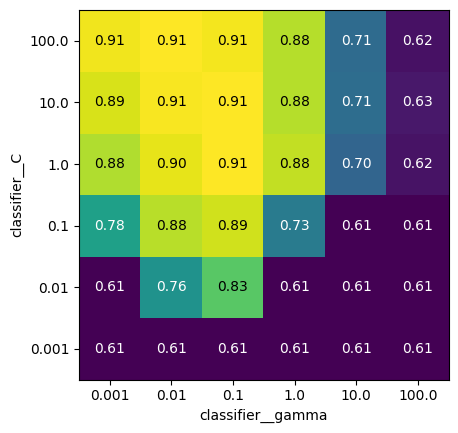

In [24]:
scores = np.array(grid_1.cv_results_['mean_test_score']).reshape(6, 6, 2)
scores = scores[:, :, 0]
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

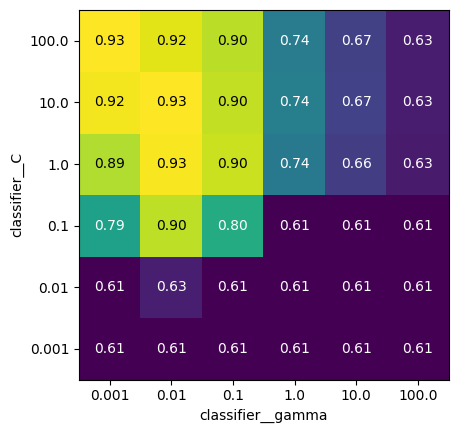

In [25]:
scores = np.array(grid_1.cv_results_['mean_test_score']).reshape(6, 6, 2)
scores = scores[:, :, 1]
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

In [23]:
from sklearn import metrics

def print_metrics(model, X_test, y_test):
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))

In [27]:
print_metrics(grid_1.best_estimator_, X_test, y_test)

precision_score: 0.9169054441260746
recall_score: 0.8815426997245179
f1_score: 0.8988764044943821
accuracy_score: 0.9218241042345277


## Drugi model - XGBoost

In [28]:
from scipy.stats.distributions import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier

param_distribution = {
    'classifier__max_depth': randint(6, 50),
    'classifier__learning_rate': uniform(0.001, 0.1-0.001),
    'classifier__n_estimators': randint(150, 500),
    'classifier__gamma': uniform(0, 3),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__min_child_weight': randint(1, 11)
}

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

pipe = Pipeline([
    ('preprocessing', final_pipeline),
    ('pca', PCA(11)),
    ('classifier', XGBClassifier())
])
                 
grid_2 = RandomizedSearchCV(pipe, param_distribution, cv=kfold, return_train_score=True, verbose=10, n_iter=30)

grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START classifier__colsample_bytree=0.6958432427421151, classifier__gamma=0.4939271691878614, classifier__learning_rate=0.050470016031382264, classifier__max_depth=6, classifier__min_child_weight=5, classifier__n_estimators=301, classifier__subsample=0.7174727068901876
[CV 1/5; 1/30] END classifier__colsample_bytree=0.6958432427421151, classifier__gamma=0.4939271691878614, classifier__learning_rate=0.050470016031382264, classifier__max_depth=6, classifier__min_child_weight=5, classifier__n_estimators=301, classifier__subsample=0.7174727068901876;, score=(train=0.955, test=0.906) total time=   0.4s
[CV 2/5; 1/30] START classifier__colsample_bytree=0.6958432427421151, classifier__gamma=0.4939271691878614, classifier__learning_rate=0.050470016031382264, classifier__max_depth=6, classifier__min_child_weight=5, classifier__n_estimators=301, classifier__subsample=0.7174727068901876
[CV 2/5; 1/30] END classifier__cols

[CV 4/5; 3/30] END classifier__colsample_bytree=0.9310385767462995, classifier__gamma=0.6995717576537875, classifier__learning_rate=0.005433396138009138, classifier__max_depth=25, classifier__min_child_weight=5, classifier__n_estimators=261, classifier__subsample=0.5307587967329506;, score=(train=0.920, test=0.890) total time=   0.4s
[CV 5/5; 3/30] START classifier__colsample_bytree=0.9310385767462995, classifier__gamma=0.6995717576537875, classifier__learning_rate=0.005433396138009138, classifier__max_depth=25, classifier__min_child_weight=5, classifier__n_estimators=261, classifier__subsample=0.5307587967329506
[CV 5/5; 3/30] END classifier__colsample_bytree=0.9310385767462995, classifier__gamma=0.6995717576537875, classifier__learning_rate=0.005433396138009138, classifier__max_depth=25, classifier__min_child_weight=5, classifier__n_estimators=261, classifier__subsample=0.5307587967329506;, score=(train=0.919, test=0.909) total time=   0.4s
[CV 1/5; 4/30] START classifier__colsample_

[CV 3/5; 6/30] END classifier__colsample_bytree=0.7508812021895441, classifier__gamma=0.2996068951546379, classifier__learning_rate=0.08257477986711842, classifier__max_depth=14, classifier__min_child_weight=7, classifier__n_estimators=376, classifier__subsample=0.6924737941973009;, score=(train=0.967, test=0.933) total time=   0.5s
[CV 4/5; 6/30] START classifier__colsample_bytree=0.7508812021895441, classifier__gamma=0.2996068951546379, classifier__learning_rate=0.08257477986711842, classifier__max_depth=14, classifier__min_child_weight=7, classifier__n_estimators=376, classifier__subsample=0.6924737941973009
[CV 4/5; 6/30] END classifier__colsample_bytree=0.7508812021895441, classifier__gamma=0.2996068951546379, classifier__learning_rate=0.08257477986711842, classifier__max_depth=14, classifier__min_child_weight=7, classifier__n_estimators=376, classifier__subsample=0.6924737941973009;, score=(train=0.965, test=0.904) total time=   0.6s
[CV 5/5; 6/30] START classifier__colsample_byt

[CV 2/5; 9/30] END classifier__colsample_bytree=0.8271409571459092, classifier__gamma=2.6695385613854663, classifier__learning_rate=0.0868922507795908, classifier__max_depth=44, classifier__min_child_weight=7, classifier__n_estimators=322, classifier__subsample=0.9755989276575676;, score=(train=0.956, test=0.923) total time=   0.7s
[CV 3/5; 9/30] START classifier__colsample_bytree=0.8271409571459092, classifier__gamma=2.6695385613854663, classifier__learning_rate=0.0868922507795908, classifier__max_depth=44, classifier__min_child_weight=7, classifier__n_estimators=322, classifier__subsample=0.9755989276575676
[CV 3/5; 9/30] END classifier__colsample_bytree=0.8271409571459092, classifier__gamma=2.6695385613854663, classifier__learning_rate=0.0868922507795908, classifier__max_depth=44, classifier__min_child_weight=7, classifier__n_estimators=322, classifier__subsample=0.9755989276575676;, score=(train=0.959, test=0.932) total time=   0.7s
[CV 4/5; 9/30] START classifier__colsample_bytree

[CV 1/5; 12/30] END classifier__colsample_bytree=0.9778882816821055, classifier__gamma=1.244783105453331, classifier__learning_rate=0.01886454192348758, classifier__max_depth=27, classifier__min_child_weight=6, classifier__n_estimators=259, classifier__subsample=0.8211225952699415;, score=(train=0.947, test=0.901) total time=   0.5s
[CV 2/5; 12/30] START classifier__colsample_bytree=0.9778882816821055, classifier__gamma=1.244783105453331, classifier__learning_rate=0.01886454192348758, classifier__max_depth=27, classifier__min_child_weight=6, classifier__n_estimators=259, classifier__subsample=0.8211225952699415
[CV 2/5; 12/30] END classifier__colsample_bytree=0.9778882816821055, classifier__gamma=1.244783105453331, classifier__learning_rate=0.01886454192348758, classifier__max_depth=27, classifier__min_child_weight=6, classifier__n_estimators=259, classifier__subsample=0.8211225952699415;, score=(train=0.941, test=0.912) total time=   0.5s
[CV 3/5; 12/30] START classifier__colsample_by

[CV 5/5; 14/30] END classifier__colsample_bytree=0.7779514329030388, classifier__gamma=1.6466606086842885, classifier__learning_rate=0.028499172092863657, classifier__max_depth=27, classifier__min_child_weight=4, classifier__n_estimators=447, classifier__subsample=0.7904257392049987;, score=(train=0.966, test=0.908) total time=   1.0s
[CV 1/5; 15/30] START classifier__colsample_bytree=0.6481984597541752, classifier__gamma=1.940228532275312, classifier__learning_rate=0.06092640531838534, classifier__max_depth=15, classifier__min_child_weight=1, classifier__n_estimators=161, classifier__subsample=0.667139046059865
[CV 1/5; 15/30] END classifier__colsample_bytree=0.6481984597541752, classifier__gamma=1.940228532275312, classifier__learning_rate=0.06092640531838534, classifier__max_depth=15, classifier__min_child_weight=1, classifier__n_estimators=161, classifier__subsample=0.667139046059865;, score=(train=0.966, test=0.914) total time=   0.4s
[CV 2/5; 15/30] START classifier__colsample_by

[CV 4/5; 17/30] END classifier__colsample_bytree=0.7229513031060903, classifier__gamma=2.4175053971633726, classifier__learning_rate=0.010754384190700923, classifier__max_depth=17, classifier__min_child_weight=5, classifier__n_estimators=155, classifier__subsample=0.6886591313949849;, score=(train=0.925, test=0.898) total time=   0.3s
[CV 5/5; 17/30] START classifier__colsample_bytree=0.7229513031060903, classifier__gamma=2.4175053971633726, classifier__learning_rate=0.010754384190700923, classifier__max_depth=17, classifier__min_child_weight=5, classifier__n_estimators=155, classifier__subsample=0.6886591313949849
[CV 5/5; 17/30] END classifier__colsample_bytree=0.7229513031060903, classifier__gamma=2.4175053971633726, classifier__learning_rate=0.010754384190700923, classifier__max_depth=17, classifier__min_child_weight=5, classifier__n_estimators=155, classifier__subsample=0.6886591313949849;, score=(train=0.926, test=0.916) total time=   0.3s
[CV 1/5; 18/30] START classifier__colsam

[CV 3/5; 20/30] END classifier__colsample_bytree=0.7359127367119344, classifier__gamma=0.22003540609320438, classifier__learning_rate=0.0547351846514935, classifier__max_depth=41, classifier__min_child_weight=4, classifier__n_estimators=157, classifier__subsample=0.6071622565650958;, score=(train=0.958, test=0.935) total time=   0.3s
[CV 4/5; 20/30] START classifier__colsample_bytree=0.7359127367119344, classifier__gamma=0.22003540609320438, classifier__learning_rate=0.0547351846514935, classifier__max_depth=41, classifier__min_child_weight=4, classifier__n_estimators=157, classifier__subsample=0.6071622565650958
[CV 4/5; 20/30] END classifier__colsample_bytree=0.7359127367119344, classifier__gamma=0.22003540609320438, classifier__learning_rate=0.0547351846514935, classifier__max_depth=41, classifier__min_child_weight=4, classifier__n_estimators=157, classifier__subsample=0.6071622565650958;, score=(train=0.953, test=0.908) total time=   0.3s
[CV 5/5; 20/30] START classifier__colsample

[CV 2/5; 23/30] END classifier__colsample_bytree=0.8244274203120341, classifier__gamma=0.8728566349129842, classifier__learning_rate=0.025822874738277057, classifier__max_depth=36, classifier__min_child_weight=9, classifier__n_estimators=228, classifier__subsample=0.8723888102902226;, score=(train=0.937, test=0.905) total time=   0.5s
[CV 3/5; 23/30] START classifier__colsample_bytree=0.8244274203120341, classifier__gamma=0.8728566349129842, classifier__learning_rate=0.025822874738277057, classifier__max_depth=36, classifier__min_child_weight=9, classifier__n_estimators=228, classifier__subsample=0.8723888102902226
[CV 3/5; 23/30] END classifier__colsample_bytree=0.8244274203120341, classifier__gamma=0.8728566349129842, classifier__learning_rate=0.025822874738277057, classifier__max_depth=36, classifier__min_child_weight=9, classifier__n_estimators=228, classifier__subsample=0.8723888102902226;, score=(train=0.939, test=0.931) total time=   0.5s
[CV 4/5; 23/30] START classifier__colsam

[CV 1/5; 26/30] END classifier__colsample_bytree=0.5118355316223766, classifier__gamma=1.172176051325492, classifier__learning_rate=0.08870155313242449, classifier__max_depth=21, classifier__min_child_weight=5, classifier__n_estimators=271, classifier__subsample=0.6427889534869482;, score=(train=0.958, test=0.898) total time=   0.4s
[CV 2/5; 26/30] START classifier__colsample_bytree=0.5118355316223766, classifier__gamma=1.172176051325492, classifier__learning_rate=0.08870155313242449, classifier__max_depth=21, classifier__min_child_weight=5, classifier__n_estimators=271, classifier__subsample=0.6427889534869482
[CV 2/5; 26/30] END classifier__colsample_bytree=0.5118355316223766, classifier__gamma=1.172176051325492, classifier__learning_rate=0.08870155313242449, classifier__max_depth=21, classifier__min_child_weight=5, classifier__n_estimators=271, classifier__subsample=0.6427889534869482;, score=(train=0.966, test=0.916) total time=   0.4s
[CV 3/5; 26/30] START classifier__colsample_by

[CV 5/5; 28/30] END classifier__colsample_bytree=0.612113199179739, classifier__gamma=0.15977103771821055, classifier__learning_rate=0.08215847284767916, classifier__max_depth=25, classifier__min_child_weight=8, classifier__n_estimators=441, classifier__subsample=0.6905268340496735;, score=(train=0.962, test=0.924) total time=   0.6s
[CV 1/5; 29/30] START classifier__colsample_bytree=0.5950954904203856, classifier__gamma=1.4697875705193713, classifier__learning_rate=0.041752248398231565, classifier__max_depth=42, classifier__min_child_weight=4, classifier__n_estimators=178, classifier__subsample=0.5842935288147577
[CV 1/5; 29/30] END classifier__colsample_bytree=0.5950954904203856, classifier__gamma=1.4697875705193713, classifier__learning_rate=0.041752248398231565, classifier__max_depth=42, classifier__min_child_weight=4, classifier__n_estimators=178, classifier__subsample=0.5842935288147577;, score=(train=0.946, test=0.893) total time=   0.3s
[CV 2/5; 29/30] START classifier__colsamp

{'classifier__colsample_bytree': 0.6149797826436689,
 'classifier__gamma': 0.4949198339368057,
 'classifier__learning_rate': 0.05501460684031166,
 'classifier__max_depth': 44,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 281,
 'classifier__subsample': 0.9680220569471438}

In [29]:
print_metrics(grid_2.best_estimator_, X_test, y_test)

precision_score: 0.8934426229508197
recall_score: 0.9008264462809917
f1_score: 0.897119341563786
accuracy_score: 0.9185667752442996


In [30]:
pipe = Pipeline([
    ('preprocessing', final_pipeline),
    ('classifier', XGBClassifier())
])
                 
grid_3 = RandomizedSearchCV(pipe, param_distribution, cv=kfold, return_train_score=True, verbose=10, n_iter=30)

grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START classifier__colsample_bytree=0.821814734497404, classifier__gamma=1.6189380401530078, classifier__learning_rate=0.06168728110789939, classifier__max_depth=39, classifier__min_child_weight=9, classifier__n_estimators=365, classifier__subsample=0.6914250819387113
[CV 1/5; 1/30] END classifier__colsample_bytree=0.821814734497404, classifier__gamma=1.6189380401530078, classifier__learning_rate=0.06168728110789939, classifier__max_depth=39, classifier__min_child_weight=9, classifier__n_estimators=365, classifier__subsample=0.6914250819387113;, score=(train=0.975, test=0.927) total time=   0.6s
[CV 2/5; 1/30] START classifier__colsample_bytree=0.821814734497404, classifier__gamma=1.6189380401530078, classifier__learning_rate=0.06168728110789939, classifier__max_depth=39, classifier__min_child_weight=9, classifier__n_estimators=365, classifier__subsample=0.6914250819387113
[CV 2/5; 1/30] END classifier__colsamp

[CV 4/5; 3/30] END classifier__colsample_bytree=0.6482880112735234, classifier__gamma=1.6540565444085205, classifier__learning_rate=0.04488070327175445, classifier__max_depth=10, classifier__min_child_weight=8, classifier__n_estimators=438, classifier__subsample=0.9312101593274473;, score=(train=0.982, test=0.942) total time=   0.9s
[CV 5/5; 3/30] START classifier__colsample_bytree=0.6482880112735234, classifier__gamma=1.6540565444085205, classifier__learning_rate=0.04488070327175445, classifier__max_depth=10, classifier__min_child_weight=8, classifier__n_estimators=438, classifier__subsample=0.9312101593274473
[CV 5/5; 3/30] END classifier__colsample_bytree=0.6482880112735234, classifier__gamma=1.6540565444085205, classifier__learning_rate=0.04488070327175445, classifier__max_depth=10, classifier__min_child_weight=8, classifier__n_estimators=438, classifier__subsample=0.9312101593274473;, score=(train=0.978, test=0.939) total time=   0.9s
[CV 1/5; 4/30] START classifier__colsample_byt

[CV 3/5; 6/30] END classifier__colsample_bytree=0.7432676352484477, classifier__gamma=0.3325314231968759, classifier__learning_rate=0.05820006388855853, classifier__max_depth=40, classifier__min_child_weight=6, classifier__n_estimators=332, classifier__subsample=0.7270271942591802;, score=(train=0.987, test=0.946) total time=   0.7s
[CV 4/5; 6/30] START classifier__colsample_bytree=0.7432676352484477, classifier__gamma=0.3325314231968759, classifier__learning_rate=0.05820006388855853, classifier__max_depth=40, classifier__min_child_weight=6, classifier__n_estimators=332, classifier__subsample=0.7270271942591802
[CV 4/5; 6/30] END classifier__colsample_bytree=0.7432676352484477, classifier__gamma=0.3325314231968759, classifier__learning_rate=0.05820006388855853, classifier__max_depth=40, classifier__min_child_weight=6, classifier__n_estimators=332, classifier__subsample=0.7270271942591802;, score=(train=0.987, test=0.939) total time=   0.7s
[CV 5/5; 6/30] START classifier__colsample_byt

[CV 2/5; 9/30] END classifier__colsample_bytree=0.8850997428132492, classifier__gamma=2.0444804761323265, classifier__learning_rate=0.09068009114978247, classifier__max_depth=29, classifier__min_child_weight=1, classifier__n_estimators=304, classifier__subsample=0.89795236370281;, score=(train=0.993, test=0.954) total time=   1.4s
[CV 3/5; 9/30] START classifier__colsample_bytree=0.8850997428132492, classifier__gamma=2.0444804761323265, classifier__learning_rate=0.09068009114978247, classifier__max_depth=29, classifier__min_child_weight=1, classifier__n_estimators=304, classifier__subsample=0.89795236370281
[CV 3/5; 9/30] END classifier__colsample_bytree=0.8850997428132492, classifier__gamma=2.0444804761323265, classifier__learning_rate=0.09068009114978247, classifier__max_depth=29, classifier__min_child_weight=1, classifier__n_estimators=304, classifier__subsample=0.89795236370281;, score=(train=0.994, test=0.946) total time=   1.4s
[CV 4/5; 9/30] START classifier__colsample_bytree=0.

[CV 1/5; 12/30] END classifier__colsample_bytree=0.5234916635286675, classifier__gamma=0.5812868370396975, classifier__learning_rate=0.08497030553127266, classifier__max_depth=11, classifier__min_child_weight=8, classifier__n_estimators=306, classifier__subsample=0.8856782428462995;, score=(train=0.986, test=0.936) total time=   0.5s
[CV 2/5; 12/30] START classifier__colsample_bytree=0.5234916635286675, classifier__gamma=0.5812868370396975, classifier__learning_rate=0.08497030553127266, classifier__max_depth=11, classifier__min_child_weight=8, classifier__n_estimators=306, classifier__subsample=0.8856782428462995
[CV 2/5; 12/30] END classifier__colsample_bytree=0.5234916635286675, classifier__gamma=0.5812868370396975, classifier__learning_rate=0.08497030553127266, classifier__max_depth=11, classifier__min_child_weight=8, classifier__n_estimators=306, classifier__subsample=0.8856782428462995;, score=(train=0.983, test=0.951) total time=   0.6s
[CV 3/5; 12/30] START classifier__colsample

[CV 5/5; 14/30] END classifier__colsample_bytree=0.6322502615579774, classifier__gamma=1.6745454139502411, classifier__learning_rate=0.03706622569174634, classifier__max_depth=31, classifier__min_child_weight=10, classifier__n_estimators=306, classifier__subsample=0.8760149941898048;, score=(train=0.968, test=0.931) total time=   0.6s
[CV 1/5; 15/30] START classifier__colsample_bytree=0.8609662221831338, classifier__gamma=1.3133193743300127, classifier__learning_rate=0.09726767275974331, classifier__max_depth=29, classifier__min_child_weight=9, classifier__n_estimators=240, classifier__subsample=0.5383549656432263
[CV 1/5; 15/30] END classifier__colsample_bytree=0.8609662221831338, classifier__gamma=1.3133193743300127, classifier__learning_rate=0.09726767275974331, classifier__max_depth=29, classifier__min_child_weight=9, classifier__n_estimators=240, classifier__subsample=0.5383549656432263;, score=(train=0.967, test=0.923) total time=   0.4s
[CV 2/5; 15/30] START classifier__colsampl

[CV 4/5; 17/30] END classifier__colsample_bytree=0.7213525418315376, classifier__gamma=0.7412052827139403, classifier__learning_rate=0.01194345410885048, classifier__max_depth=28, classifier__min_child_weight=6, classifier__n_estimators=166, classifier__subsample=0.766267400964384;, score=(train=0.948, test=0.935) total time=   0.4s
[CV 5/5; 17/30] START classifier__colsample_bytree=0.7213525418315376, classifier__gamma=0.7412052827139403, classifier__learning_rate=0.01194345410885048, classifier__max_depth=28, classifier__min_child_weight=6, classifier__n_estimators=166, classifier__subsample=0.766267400964384
[CV 5/5; 17/30] END classifier__colsample_bytree=0.7213525418315376, classifier__gamma=0.7412052827139403, classifier__learning_rate=0.01194345410885048, classifier__max_depth=28, classifier__min_child_weight=6, classifier__n_estimators=166, classifier__subsample=0.766267400964384;, score=(train=0.948, test=0.924) total time=   0.4s
[CV 1/5; 18/30] START classifier__colsample_by

[CV 3/5; 20/30] END classifier__colsample_bytree=0.79428754815344, classifier__gamma=1.4114811129476008, classifier__learning_rate=0.04246907114005851, classifier__max_depth=19, classifier__min_child_weight=8, classifier__n_estimators=364, classifier__subsample=0.9337755034532713;, score=(train=0.980, test=0.943) total time=   0.8s
[CV 4/5; 20/30] START classifier__colsample_bytree=0.79428754815344, classifier__gamma=1.4114811129476008, classifier__learning_rate=0.04246907114005851, classifier__max_depth=19, classifier__min_child_weight=8, classifier__n_estimators=364, classifier__subsample=0.9337755034532713
[CV 4/5; 20/30] END classifier__colsample_bytree=0.79428754815344, classifier__gamma=1.4114811129476008, classifier__learning_rate=0.04246907114005851, classifier__max_depth=19, classifier__min_child_weight=8, classifier__n_estimators=364, classifier__subsample=0.9337755034532713;, score=(train=0.981, test=0.938) total time=   0.8s
[CV 5/5; 20/30] START classifier__colsample_bytre

[CV 2/5; 23/30] END classifier__colsample_bytree=0.7425719378570268, classifier__gamma=2.713562348515585, classifier__learning_rate=0.040264499265071106, classifier__max_depth=44, classifier__min_child_weight=9, classifier__n_estimators=171, classifier__subsample=0.7778327045075035;, score=(train=0.957, test=0.947) total time=   0.3s
[CV 3/5; 23/30] START classifier__colsample_bytree=0.7425719378570268, classifier__gamma=2.713562348515585, classifier__learning_rate=0.040264499265071106, classifier__max_depth=44, classifier__min_child_weight=9, classifier__n_estimators=171, classifier__subsample=0.7778327045075035
[CV 3/5; 23/30] END classifier__colsample_bytree=0.7425719378570268, classifier__gamma=2.713562348515585, classifier__learning_rate=0.040264499265071106, classifier__max_depth=44, classifier__min_child_weight=9, classifier__n_estimators=171, classifier__subsample=0.7778327045075035;, score=(train=0.957, test=0.946) total time=   0.3s
[CV 4/5; 23/30] START classifier__colsample

[CV 1/5; 26/30] END classifier__colsample_bytree=0.9468703732284134, classifier__gamma=0.5385718744808886, classifier__learning_rate=0.09129470016164386, classifier__max_depth=20, classifier__min_child_weight=8, classifier__n_estimators=428, classifier__subsample=0.8662050574878541;, score=(train=0.991, test=0.929) total time=   0.9s
[CV 2/5; 26/30] START classifier__colsample_bytree=0.9468703732284134, classifier__gamma=0.5385718744808886, classifier__learning_rate=0.09129470016164386, classifier__max_depth=20, classifier__min_child_weight=8, classifier__n_estimators=428, classifier__subsample=0.8662050574878541
[CV 2/5; 26/30] END classifier__colsample_bytree=0.9468703732284134, classifier__gamma=0.5385718744808886, classifier__learning_rate=0.09129470016164386, classifier__max_depth=20, classifier__min_child_weight=8, classifier__n_estimators=428, classifier__subsample=0.8662050574878541;, score=(train=0.990, test=0.951) total time=   0.9s
[CV 3/5; 26/30] START classifier__colsample

[CV 5/5; 28/30] END classifier__colsample_bytree=0.7414408007695954, classifier__gamma=1.4106823797858072, classifier__learning_rate=0.016169517297092012, classifier__max_depth=41, classifier__min_child_weight=7, classifier__n_estimators=231, classifier__subsample=0.7034776016317922;, score=(train=0.954, test=0.928) total time=   0.5s
[CV 1/5; 29/30] START classifier__colsample_bytree=0.5916655028150088, classifier__gamma=0.9332841348337217, classifier__learning_rate=0.01357111567863781, classifier__max_depth=28, classifier__min_child_weight=3, classifier__n_estimators=252, classifier__subsample=0.9776304599933507
[CV 1/5; 29/30] END classifier__colsample_bytree=0.5916655028150088, classifier__gamma=0.9332841348337217, classifier__learning_rate=0.01357111567863781, classifier__max_depth=28, classifier__min_child_weight=3, classifier__n_estimators=252, classifier__subsample=0.9776304599933507;, score=(train=0.977, test=0.938) total time=   0.8s
[CV 2/5; 29/30] START classifier__colsampl

{'classifier__colsample_bytree': 0.962545809317217,
 'classifier__gamma': 0.41596243966872626,
 'classifier__learning_rate': 0.023168535868395727,
 'classifier__max_depth': 48,
 'classifier__min_child_weight': 2,
 'classifier__n_estimators': 309,
 'classifier__subsample': 0.9146727081882269}

In [31]:
print_metrics(grid_3.best_estimator_, X_test, y_test)

precision_score: 0.9438202247191011
recall_score: 0.9256198347107438
f1_score: 0.9346314325452015
accuracy_score: 0.9489685124864278


W obu przypadkach **brak PCA** daje znacznie lepsze wyniki.

## PIerwsza sieć neuronowa

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, History

keras.backend.clear_session()

def build_model(n_hidden=1, n_neurons=[30], learning_rate=3e-3, input_shape=(X_train.shape[1], )):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons[layer % len(n_neurons)], activation='relu'))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [40]:
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)
keras_class

C:\Users\krzys\AppData\Local\Temp\ipykernel_17116\1152597368.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

training_histories = []

# Define a custom callback to collect the training history
class TrainingHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_history.append(logs)

    def on_train_end(self, logs=None):
        training_histories.append(self.epoch_history)

param_grid = {
    'classifier__n_hidden': [1],#[1, 2, 3, 4],
    'classifier__n_neurons': [[100]], #[[300], [100], [50], [20], [100, 50, 20], [300, 150, 50, 10], [50, 10]],
    'classifier__epochs': [64],
    'classifier__batch_size': [32],
    'classifier__validation_split': [0.1],
    'classifier__callbacks': [[
        EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1), 
        LearningRateScheduler(step_decay),
        TrainingHistory(),
    ]],
}

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

pipe = Pipeline([
    ('preprocessing', final_pipeline),
    ('classifier', keras_class)
])

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, verbose=2)
grid_4.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/64
83/83 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.9000 - val_loss: 0.2119 - val_accuracy: 0.9186 - lr: 0.0100
Epoch 2/64
83/83 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.9136 - val_loss: 0.2025 - val_accuracy: 0.9220 - lr: 0.0100
Epoch 3/64
83/83 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9219 - val_loss: 0.1880 - val_accuracy: 0.9288 - lr: 0.0100
Epoch 4/64
83/83 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9305 - val_loss: 0.1840 - val_accuracy: 0.9390 - lr: 0.0100
Epoch 5/64
83/83 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9268 - val_loss: 0.1851 - val_accuracy: 0.9186 - lr: 0.0100
Epoch 6/64
83/83 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 0.9219 - val_loss: 0.1692 - val_accuracy: 0.9424 - lr: 0.0100
Epoch 7/64
83/83 [=====

Epoch 10/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9373 - val_loss: 0.2141 - val_accuracy: 0.9288 - lr: 0.0050
Epoch 11/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.9343 - val_loss: 0.1950 - val_accuracy: 0.9390 - lr: 0.0050
Epoch 12/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.9456 - val_loss: 0.2053 - val_accuracy: 0.9356 - lr: 0.0050
Epoch 13/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9419 - val_loss: 0.2063 - val_accuracy: 0.9288 - lr: 0.0050
Epoch 14/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9521 - val_loss: 0.2028 - val_accuracy: 0.9390 - lr: 0.0050
Epoch 15/64
83/83 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.9441 - val_loss: 0.1930 - val_accuracy: 0.9390 - lr: 0.0050
Epoch 16/64
83/83 [==============================] - 0s 2ms/step - loss: 0.1

Epoch 5/64
83/83 [==============================] - 0s 1ms/step - loss: 0.2094 - accuracy: 0.9234 - val_loss: 0.1946 - val_accuracy: 0.9186 - lr: 0.0100
Epoch 6/64
83/83 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9253 - val_loss: 0.1918 - val_accuracy: 0.9186 - lr: 0.0100
Epoch 7/64
83/83 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9226 - val_loss: 0.1884 - val_accuracy: 0.9220 - lr: 0.0100
Epoch 8/64
83/83 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9230 - val_loss: 0.1954 - val_accuracy: 0.9119 - lr: 0.0100
Epoch 9/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.9200 - val_loss: 0.1997 - val_accuracy: 0.9288 - lr: 0.0100
Epoch 10/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9290 - val_loss: 0.1925 - val_accuracy: 0.9220 - lr: 0.0050
Epoch 11/64
83/83 [==============================] - 0s 1ms/step - loss: 0.1768 -

104/104 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9526 - val_loss: 0.1708 - val_accuracy: 0.9375 - lr: 0.0012
Epoch 31/64
104/104 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.9490 - val_loss: 0.1738 - val_accuracy: 0.9348 - lr: 0.0012
Epoch 32/64
104/104 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9562 - val_loss: 0.1765 - val_accuracy: 0.9348 - lr: 0.0012
Epoch 33/64
104/104 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.9565 - val_loss: 0.1759 - val_accuracy: 0.9348 - lr: 0.0012
Epoch 34/64
104/104 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9535 - val_loss: 0.1774 - val_accuracy: 0.9348 - lr: 0.0012
Epoch 34: early stopping


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1337, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('fill',
                                                         FeatureUnion(transformer_list=[('median',
                                                                                         Pipeline(steps=[('selector',
                                                                                                          DataFrameSelector(attribute_names=['word_freq_make',
                                                                                                                                             'word_freq_address',
                                                                                                                                             'word_freq_all',
                                                                                                                                             'word_freq_3d',
                                                                                                                                             'word_freq_our',
                                                                                                                                             'word_freq_over',
                                                                                                                                             'wo...
             param_grid={'classifier__batch_size': [32],
                         'classifier__callbacks': [[<keras.callbacks.EarlyStopping object at 0x00000126ECE69250>,
                                                    <keras.callbacks.LearningRateScheduler object at 0x00000126FADC8650>,
                                                    <__main__.TrainingHistory object at 0x00000126FCDBA590>]],
                         'classifier__epochs': [64],
                         'classifier__n_hidden': [1],
                         'classifier__n_neurons': [[100]],
                         'classifier__validation_split': [0.1]},
             verbose=2)

In [85]:
grid_4.best_params_

{'classifier__batch_size': 32,
 'classifier__callbacks': [<keras.callbacks.EarlyStopping at 0x126ece69250>,
 'classifier__epochs': 64,
 'classifier__n_hidden': 1,
 'classifier__n_neurons': [100],
 'classifier__validation_split': 0.1}

In [86]:
print_metrics(grid_4, X_test, y_test)

29/29 [==============================] - 0s 700us/step
precision_score: 0.940677966101695
29/29 [==============================] - 0s 722us/step
recall_score: 0.9173553719008265
29/29 [==============================] - 0s 672us/step
f1_score: 0.9288702928870294
29/29 [==============================] - 0s 710us/step
accuracy_score: 0.9446254071661238


In [87]:
training_histories

[[{'loss': 0.2994946539402008,
   'accuracy': 0.8999622464179993,
   'val_loss': 0.21188753843307495,
   'val_accuracy': 0.9186440706253052,
   'lr': 0.01},
  {'loss': 0.23529121279716492,
   'accuracy': 0.9135522842407227,
   'val_loss': 0.20245757699012756,
   'val_accuracy': 0.9220339059829712,
   'lr': 0.01},
  {'loss': 0.23012864589691162,
   'accuracy': 0.9218572974205017,
   'val_loss': 0.18795499205589294,
   'val_accuracy': 0.9288135766983032,
   'lr': 0.01},
  {'loss': 0.2030031383037567,
   'accuracy': 0.9305398464202881,
   'val_loss': 0.1840004026889801,
   'val_accuracy': 0.9389830231666565,
   'lr': 0.01},
  {'loss': 0.20093822479248047,
   'accuracy': 0.9267648458480835,
   'val_loss': 0.18506020307540894,
   'val_accuracy': 0.9186440706253052,
   'lr': 0.01},
  {'loss': 0.21907266974449158,
   'accuracy': 0.9218572974205017,
   'val_loss': 0.16923581063747406,
   'val_accuracy': 0.9423728585243225,
   'lr': 0.01},
  {'loss': 0.19954131543636322,
   'accuracy': 0.933182

In [88]:
learning_history = training_histories[grid_4.best_index_]

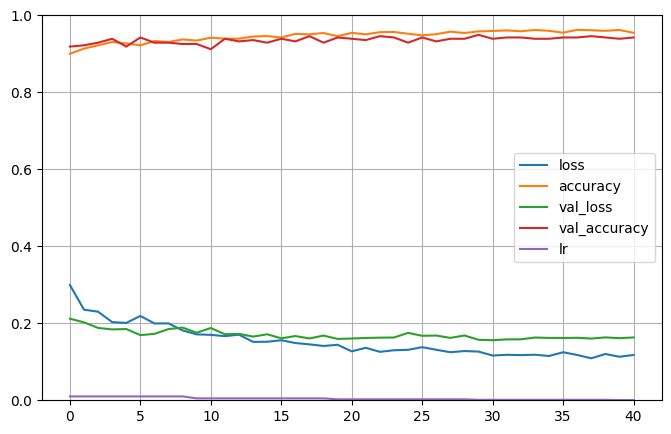

In [90]:
pd.DataFrame(learning_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# print(learning_history)